<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/PyTorch/PyTorch%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5_%EB%9F%AC%EB%8B%9D_%EC%9E%85%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference 링크

https://wikidocs.net/book/2788

# 파이토치 기초

### 파이토치 패키지의 기본 구성

torch
* 메인 네임스페이스
* 텐서 등의 다양한 수학 함수가 포함되어져 있으며 Numpy와 유사한 구조를 가짐

torch.autograd
* 자동 미분을 위한 함수들이 포함
* 자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)나 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'Function' 등이 포함

torch.nn
* 신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의

torch.optim
* 확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 중심으로 한 파라미터 최적화 알고리즘이 구현

torch.utils.data
* SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수

torch.onnx
* ONNX(Open Neural Network Exchange)의 포맷으로 모델을 익스포트(export)할 때 사용
* 서로 다른 딥 러닝 프레임워크 간에 모델을 공유할 때 사용하는 포맷

### 텐서 조작하기 1

##### NLP 분야의 3D 텐서 예로 이해하기

In [2]:
paragraph = [['나는 사과를 좋아해'], 
             ['나는 바나나를 좋아해'], 
             ['나는 사과를 싫어해'], 
             ['나는 바나나를 싫어해']]

paragraph = [['나는', '사과를', '좋아해'], 
             ['나는', '바나나를', '좋아해'], 
             ['나는', '사과를', '싫어해'], 
             ['나는', '바나나를', '싫어해']]

# '나는' = [0.1, 0.2, 0.9]
# '사과를' = [0.3, 0.5, 0.1]
# '바나나를' = [0.3, 0.5, 0.2]
# '좋아해' = [0.7, 0.6, 0.5]
# '싫어해' = [0.5, 0.6, 0.7]

paragraph = [[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
            [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]],
            [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],
            [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]

batch_size = 2

batch_1 = [[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
          [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]]]

batch_2 = [[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],
          [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]

##### 넘파이로 텐서 만들기

In [5]:
import numpy as np

In [6]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)
print('Rank of t : ', t.ndim)
print('Shape of t : ', t.shape)

[0. 1. 2. 3. 4. 5. 6.]
Rank of t :  1
Shape of t :  (7,)


In [7]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1])
print('t[2:5] t[4:-1]  = ', t[2:5], t[4:-1])
print('t[:2] t[3:]     = ', t[:2], t[3:])

t[0] t[1] t[-1] =  0.0 1.0 6.0
t[2:5] t[4:-1]  =  [2. 3. 4.] [4. 5.]
t[:2] t[3:]     =  [0. 1.] [3. 4. 5. 6.]


In [8]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [9]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  2
Shape of t:  (4, 3)


##### 파이토치 텐서 선언하기

In [10]:
import torch

In [11]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [12]:
print(t.dim())  
print(t.shape)  
print(t.size()) 

1
torch.Size([7])
torch.Size([7])


In [13]:
print(t[0], t[1], t[-1]) 
print(t[2:5], t[4:-1])  
print(t[:2], t[3:])

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


In [14]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [15]:
print(t.dim())
print(t.size())

2
torch.Size([4, 3])


In [16]:
print(t[:, 1])
print(t[:, 1].size())

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [17]:
print(t[:, :-1])

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


In [18]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [19]:
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3])
print(m1 + m2)

tensor([[4., 5.]])


In [20]:
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


In [21]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape)
print('Shape of Matrix 2: ', m2.shape) 
print(m1.matmul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [22]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) 
print('Shape of Matrix 2: ', m2.shape) 
print(m1 * m2) 
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [23]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [24]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [25]:
print(t.mean())

tensor(2.5000)


In [26]:
print(t.mean(dim=0))

tensor([2., 3.])


In [27]:
print(t.mean(dim=1))

tensor([1.5000, 3.5000])


In [28]:
print(t.mean(dim=-1))

tensor([1.5000, 3.5000])


In [29]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [30]:
print(t.sum()) 
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1)) 

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [31]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [32]:
print(t.max())

tensor(4.)


In [33]:
print(t.max(dim=0))

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [34]:
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [35]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


### 텐서 조작하기 2

In [36]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])

ft = torch.FloatTensor(t)

In [37]:
print(ft.shape)

torch.Size([2, 2, 3])


In [38]:
print(ft.view([-1, 3])) 
print(ft.view([-1, 3]).shape)


tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [39]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


In [40]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [41]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


In [42]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [43]:
print(ft.unsqueeze(0)) 
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [44]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [45]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [46]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [47]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [48]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [49]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [50]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


In [51]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [52]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [53]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [54]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [55]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [56]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [57]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [58]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [59]:
print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [60]:
print(torch.zeros_like(x))

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [61]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [62]:
print(x.mul(2.))
print(x) 

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [63]:
print(x.mul_(2.)) 
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


# 선형 회귀

### 선형 회귀

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [65]:
torch.manual_seed(1)

In [77]:
x = torch.FloatTensor([[1], [2], [3]])
y = torch.FloatTensor([[2], [4], [6]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999

for epoch in range(nb_epochs + 1):

  hypothesis = x * W + b

  cost = torch.mean((hypothesis - y) ** 2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:

    print('Epoch {:4d}/{} W : {:.3f}, b : {:.3f}, Cost : {:.6f}'.format(
        epoch, nb_epochs, W.item(), b.item(), cost.item()
    ))

Epoch    0/1999 W : 0.187, b : 0.080, Cost : 18.666666
Epoch  100/1999 W : 1.746, b : 0.578, Cost : 0.048171
Epoch  200/1999 W : 1.800, b : 0.454, Cost : 0.029767
Epoch  300/1999 W : 1.843, b : 0.357, Cost : 0.018394
Epoch  400/1999 W : 1.876, b : 0.281, Cost : 0.011366
Epoch  500/1999 W : 1.903, b : 0.221, Cost : 0.007024
Epoch  600/1999 W : 1.924, b : 0.174, Cost : 0.004340
Epoch  700/1999 W : 1.940, b : 0.136, Cost : 0.002682
Epoch  800/1999 W : 1.953, b : 0.107, Cost : 0.001657
Epoch  900/1999 W : 1.963, b : 0.084, Cost : 0.001024
Epoch 1000/1999 W : 1.971, b : 0.066, Cost : 0.000633
Epoch 1100/1999 W : 1.977, b : 0.052, Cost : 0.000391
Epoch 1200/1999 W : 1.982, b : 0.041, Cost : 0.000242
Epoch 1300/1999 W : 1.986, b : 0.032, Cost : 0.000149
Epoch 1400/1999 W : 1.989, b : 0.025, Cost : 0.000092
Epoch 1500/1999 W : 1.991, b : 0.020, Cost : 0.000057
Epoch 1600/1999 W : 1.993, b : 0.016, Cost : 0.000035
Epoch 1700/1999 W : 1.995, b : 0.012, Cost : 0.000022
Epoch 1800/1999 W : 1.996, 

In [78]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


### 자동 미분

In [79]:
import torch

In [80]:
w = torch.tensor(2.0, requires_grad=True)

In [81]:
y = w**2
z = 2*y + 5

In [82]:
z.backward()

In [83]:
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


### 다중 선형 회귀

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [85]:
torch.manual_seed(1)

In [86]:
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [87]:
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [89]:
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):

  hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

  cost = torch.mean((hypothesis - y_train) ** 2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()


  if epoch % 100 == 0:

    print('Epoch {:4d}/{}, w1 : {:.3f}, w2 : {:.3f}, w3 : {:.3f}, b : {:.3f}, Cost : {:.6f}'.format(
        epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
    ))

Epoch    0/1000, w1 : 0.459, w2 : 0.458, w3 : 0.464, b : 0.005, Cost : 9298.520508
Epoch  100/1000, w1 : 0.674, w2 : 0.661, w3 : 0.676, b : 0.008, Cost : 1.562946
Epoch  200/1000, w1 : 0.679, w2 : 0.655, w3 : 0.677, b : 0.008, Cost : 1.496967
Epoch  300/1000, w1 : 0.684, w2 : 0.649, w3 : 0.677, b : 0.008, Cost : 1.434433
Epoch  400/1000, w1 : 0.689, w2 : 0.643, w3 : 0.678, b : 0.008, Cost : 1.375144
Epoch  500/1000, w1 : 0.695, w2 : 0.638, w3 : 0.678, b : 0.009, Cost : 1.318964
Epoch  600/1000, w1 : 0.699, w2 : 0.633, w3 : 0.679, b : 0.009, Cost : 1.265695
Epoch  700/1000, w1 : 0.704, w2 : 0.627, w3 : 0.679, b : 0.009, Cost : 1.215217
Epoch  800/1000, w1 : 0.709, w2 : 0.622, w3 : 0.679, b : 0.009, Cost : 1.167346
Epoch  900/1000, w1 : 0.714, w2 : 0.617, w3 : 0.680, b : 0.009, Cost : 1.121989
Epoch 1000/1000, w1 : 0.718, w2 : 0.612, w3 : 0.680, b : 0.009, Cost : 1.078964


In [90]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [92]:
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    hypothesis = x_train.matmul(W) + b

    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

### nn.Module로 구현하는 선형 회귀

In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [94]:
torch.manual_seed(1)

In [95]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [97]:
model = nn.Linear(1,1)

In [98]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [99]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [100]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward() 
    optimizer.step()

    if epoch % 100 == 0:

      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [101]:
new_var =  torch.FloatTensor([[4.0]])
pred_y = model(new_var) 

print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


In [103]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


In [104]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [105]:
torch.manual_seed(1)

In [106]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [107]:
model = nn.Linear(3,1)

In [108]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [109]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [111]:
nb_epochs = 5000
for epoch in range(nb_epochs+1):


    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train) 

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 1000 == 0:

      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/5000 Cost: 0.199762
Epoch 1000/5000 Cost: 0.192977
Epoch 2000/5000 Cost: 0.188537
Epoch 3000/5000 Cost: 0.185489
Epoch 4000/5000 Cost: 0.183274
Epoch 5000/5000 Cost: 0.181563


In [113]:
new_var =  torch.FloatTensor([[73, 80, 75]])
pred_y = model(new_var) 

print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.3696]], grad_fn=<AddmmBackward0>)


In [114]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9728, 0.4763, 0.5596]], requires_grad=True), Parameter containing:
tensor([0.2831], requires_grad=True)]


### 클래스로 파이토치 모델 구현하기

In [117]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [118]:
torch.manual_seed(1)

In [119]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [120]:
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    return self.linear(x)

In [121]:
model = LinearRegressionModel()

In [122]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [123]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward() 
    optimizer.step()

    if epoch % 100 == 0:

      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [124]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [125]:
torch.manual_seed(1)

In [135]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])

y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [140]:
class MultivariateLinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [141]:
model = MultivariateLinearRegressionModel()

In [142]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [143]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train) 
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:

      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31362.458984
Epoch  100/2000 Cost: 0.267419
Epoch  200/2000 Cost: 0.266823
Epoch  300/2000 Cost: 0.266239
Epoch  400/2000 Cost: 0.265651
Epoch  500/2000 Cost: 0.265086
Epoch  600/2000 Cost: 0.264524
Epoch  700/2000 Cost: 0.263962
Epoch  800/2000 Cost: 0.263412
Epoch  900/2000 Cost: 0.262871
Epoch 1000/2000 Cost: 0.262337
Epoch 1100/2000 Cost: 0.261808
Epoch 1200/2000 Cost: 0.261285
Epoch 1300/2000 Cost: 0.260773
Epoch 1400/2000 Cost: 0.260260
Epoch 1500/2000 Cost: 0.259755
Epoch 1600/2000 Cost: 0.259250
Epoch 1700/2000 Cost: 0.258762
Epoch 1800/2000 Cost: 0.258269
Epoch 1900/2000 Cost: 0.257777
Epoch 2000/2000 Cost: 0.257306


### 미니 배치와 데이터 로드

In [144]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [145]:
from torch.utils.data import TensorDataset 
from torch.utils.data import DataLoader

In [146]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  

y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [147]:
dataset = TensorDataset(x_train, y_train)

In [148]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [149]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [150]:
nb_epochs = 2000
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):

    x_train, y_train = samples

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/2000 Batch 1/3 Cost: 10890.296875
Epoch    0/2000 Batch 2/3 Cost: 8011.321777
Epoch    0/2000 Batch 3/3 Cost: 1803.703613
Epoch  100/2000 Batch 1/3 Cost: 2.516155
Epoch  100/2000 Batch 2/3 Cost: 0.226712
Epoch  100/2000 Batch 3/3 Cost: 0.976971
Epoch  200/2000 Batch 1/3 Cost: 0.099835
Epoch  200/2000 Batch 2/3 Cost: 1.153070
Epoch  200/2000 Batch 3/3 Cost: 3.485477
Epoch  300/2000 Batch 1/3 Cost: 1.683091
Epoch  300/2000 Batch 2/3 Cost: 1.399419
Epoch  300/2000 Batch 3/3 Cost: 0.693343
Epoch  400/2000 Batch 1/3 Cost: 0.283813
Epoch  400/2000 Batch 2/3 Cost: 2.050392
Epoch  400/2000 Batch 3/3 Cost: 0.316441
Epoch  500/2000 Batch 1/3 Cost: 0.282868
Epoch  500/2000 Batch 2/3 Cost: 1.235426
Epoch  500/2000 Batch 3/3 Cost: 2.922088
Epoch  600/2000 Batch 1/3 Cost: 1.503517
Epoch  600/2000 Batch 2/3 Cost: 0.933602
Epoch  600/2000 Batch 3/3 Cost: 0.664751
Epoch  700/2000 Batch 1/3 Cost: 0.776379
Epoch  700/2000 Batch 2/3 Cost: 0.077539
Epoch  700/2000 Batch 3/3 Cost: 3.177746
Epoch 

In [151]:
new_var =  torch.FloatTensor([[73, 80, 75]]) 
pred_y = model(new_var) 

print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.3729]], grad_fn=<AddmmBackward0>)


### 커스텀 데이터셋

In [152]:
import torch
import torch.nn.functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [158]:
class CustomDataset(Dataset):

  def __init__(self):

    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]

    self.y_data = [[152], [185], [180], [196], [142]]

  def __len__(self):

    return len(self.x_data)

  def __getitem__(self, idx):

    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])

    return x, y

In [159]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [160]:
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [163]:
nb_epochs = 500
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):

    x_train, y_train = samples

    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, batch_idx+1, len(dataloader),
          cost.item()
          ))

Epoch    0/500 Batch 1/3 Cost: 4.224309
Epoch    0/500 Batch 2/3 Cost: 10.172216
Epoch    0/500 Batch 3/3 Cost: 7.063529
Epoch  100/500 Batch 1/3 Cost: 4.649806
Epoch  100/500 Batch 2/3 Cost: 3.937680
Epoch  100/500 Batch 3/3 Cost: 8.025761
Epoch  200/500 Batch 1/3 Cost: 3.425903
Epoch  200/500 Batch 2/3 Cost: 3.331124
Epoch  200/500 Batch 3/3 Cost: 10.553080
Epoch  300/500 Batch 1/3 Cost: 3.170776
Epoch  300/500 Batch 2/3 Cost: 3.266159
Epoch  300/500 Batch 3/3 Cost: 5.165605
Epoch  400/500 Batch 1/3 Cost: 3.179976
Epoch  400/500 Batch 2/3 Cost: 3.966679
Epoch  400/500 Batch 3/3 Cost: 0.759788
Epoch  500/500 Batch 1/3 Cost: 2.449225
Epoch  500/500 Batch 2/3 Cost: 2.553700
Epoch  500/500 Batch 3/3 Cost: 5.431113


In [164]:
new_var =  torch.FloatTensor([[73, 80, 75]]) 
pred_y = model(new_var) 

print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[153.8979]], grad_fn=<AddmmBackward0>)


# 로지스틱 회귀

### 로지스틱 회귀

In [165]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 

In [166]:
def sigmoid(x): 
    return 1/(1+np.exp(-x))

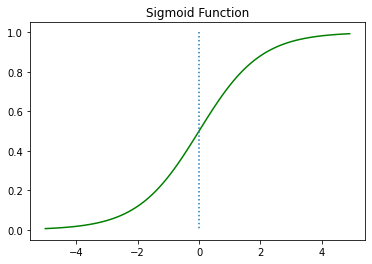

In [167]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') 
plt.title('Sigmoid Function')
plt.show()

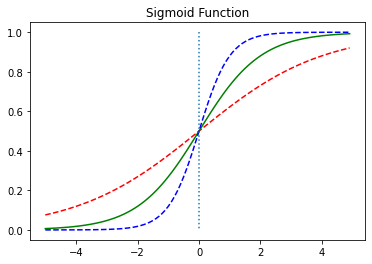

In [168]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') 
plt.plot(x, y2, 'g') 
plt.plot(x, y3, 'b', linestyle='--') 
plt.plot([0,0],[1.0,0.0], ':') 
plt.title('Sigmoid Function')
plt.show()

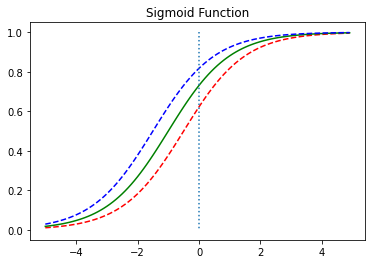

In [169]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') 
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--') 
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [170]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [171]:
torch.manual_seed(1)

In [173]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [178]:
W = torch.zeros((2, 1), requires_grad=True) 
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [179]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [180]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


### nn.Module로 구현하는 로지스틱 회귀

In [181]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [182]:
torch.manual_seed(1)

In [183]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [184]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [185]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [186]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    hypothesis = model(x_train)
    cost = F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:

        prediction = hypothesis >= torch.FloatTensor([0.5]) 

        correct_prediction = prediction.float() == y_train

        accuracy = correct_prediction.sum().item() / len(correct_prediction) 
        
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( 
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [187]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

In [188]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


### 클래스로 파이토치 모델 구현하기

In [191]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [192]:
torch.manual_seed(1)

In [193]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [190]:
class BinaryClassifier(nn.Module):

  def __init__(self):

    super().__init__()
    self.linear = nn.Linear(2, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [194]:
model = BinaryClassifier()

In [195]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    hypothesis = model(x_train)

    cost = F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) 
        correct_prediction = prediction.float() == y_train 
        accuracy = correct_prediction.sum().item() / len(correct_prediction) 
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( 
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

# 소프트맥스 회귀

### 원-핫 인코딩

원-핫 인코딩
* 선택해야 하는 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소는 0의 값을 가지도록 하는 표현 방법
* 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고 있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳습니다. 정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배
* 모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일합니다. 원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현
* 원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점

### 소프트 맥스 회귀

소프트 맥스 회귀
* 소프트맥스 함수는 분류해야하는 정답지(클래스)의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정

### 소프트 맥스 회귀의 비용 함수 구현하기

In [196]:
import torch
import torch.nn.functional as F

In [197]:
torch.manual_seed(1)

In [198]:
z = torch.FloatTensor([1, 2, 3])

In [199]:
hypothesis = F.softmax(z, dim=0)

print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [200]:
hypothesis.sum()

tensor(1.)

In [201]:
z = torch.rand(3, 5, requires_grad=True)

In [202]:
hypothesis = F.softmax(z, dim=1)

print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [203]:
y = torch.randint(5, (3,)).long()

print(y)

tensor([0, 2, 1])


In [204]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [205]:
print(y.unsqueeze(1))

tensor([[0],
        [2],
        [1]])


In [206]:
print(y_one_hot)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


In [207]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


In [208]:
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [209]:
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [210]:
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [211]:
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

### 소프트 맥스 회귀 구현하기

In [212]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [213]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [2, 2, 2, 1, 1, 1, 0, 0]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [214]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [215]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [216]:
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)

In [217]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [218]:
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


# 소프트 맥스 회귀 nn.Module로 구현하기

In [219]:
model = nn.Linear(4, 3)

In [220]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    prediction = model(x_train)

    cost = F.cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.849513
Epoch  100/1000 Cost: 0.689894
Epoch  200/1000 Cost: 0.609259
Epoch  300/1000 Cost: 0.551218
Epoch  400/1000 Cost: 0.500141
Epoch  500/1000 Cost: 0.451947
Epoch  600/1000 Cost: 0.405051
Epoch  700/1000 Cost: 0.358733
Epoch  800/1000 Cost: 0.312912
Epoch  900/1000 Cost: 0.269522
Epoch 1000/1000 Cost: 0.241922


In [221]:
class SoftmaxClassifierModel(nn.Module):

  def __init__(self):

    super().__init__()
    self.linear = nn.Linear(4, 3)


  def forward(self, x):

    return self.linear(x)

In [222]:
model = SoftmaxClassifierModel()

In [223]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    prediction = model(x_train)

    cost = F.cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.845720
Epoch  100/1000 Cost: 0.647150
Epoch  200/1000 Cost: 0.568868
Epoch  300/1000 Cost: 0.515699
Epoch  400/1000 Cost: 0.471727
Epoch  500/1000 Cost: 0.432486
Epoch  600/1000 Cost: 0.395880
Epoch  700/1000 Cost: 0.360507
Epoch  800/1000 Cost: 0.325227
Epoch  900/1000 Cost: 0.289217
Epoch 1000/1000 Cost: 0.254086


### 소프트 맥스 회귀로 MNIST 데이터 분류하기

In [224]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [225]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


In [226]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [227]:
training_epochs = 15
batch_size = 100

In [228]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [229]:
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, 
                                          shuffle=True,
                                          drop_last=True)

In [230]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [231]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [232]:
for epoch in range(training_epochs): 
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        
        X = X.view(-1, 28 * 28).to(device)
        
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577745
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404700
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456524
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515589
Epoch: 0011 cost = 0.281914085
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422735
Learning finished


Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


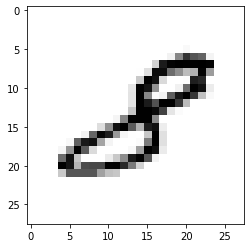

In [233]:
with torch.no_grad(): 
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()